# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [25]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1870)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1870)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities and len(cities) < 666:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

666

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
weather_data = {"City":[],"Latitude":[],"Longitude":[],"Max Temp(F)":[],"Humidity%":[],"Cloudiness%":[],"Windspeed(MPH)":[],"Hemisphere":[]} 
setnum = 1
recnum = 1
for city in cities:
    response = requests.get(query_url + city)
    response_json = response.json()
    if response.status_code == 200:
        if recnum < 50:
            print(f"Processing Record {recnum} of Set {setnum} | {city}")
            recnum = recnum + 1
        else:
            print(f"Processing Record {recnum} of Set {setnum} | {city}")
            recnum = 1
            setnum = setnum + 1
        weather_data["City"].append(city)
        weather_data["Latitude"].append(response_json["coord"]["lat"])
        weather_data["Longitude"].append(response_json["coord"]["lon"])
        weather_data["Max Temp(F)"].append(response_json["main"]["temp_max"])
        weather_data["Humidity%"].append(response_json["main"]["humidity"])
        weather_data["Cloudiness%"].append(response_json["clouds"]["all"])
        weather_data["Windspeed(MPH)"].append(response_json["wind"]["speed"])
        if response_json["coord"]["lat"] > 0:
            hemisphere = "North"
        if response_json["coord"]["lat"] <=0:
            hemisphere = "South"
        weather_data["Hemisphere"].append(hemisphere)
    else:
        print(f"City not found. Skipping...")

Processing Record 1 of Set 1 | tanabe
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | sao joao da barra
Processing Record 6 of Set 1 | luderitz
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | junagarh
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | yulara
Processing Record 13 of Set 1 | geraldton
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | dwarka
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | mahebourg
City not found. Skipping...
Processing Record 19 of Set 1 | sao filipe
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | butaritari
City not found. Skipping...
Processing Record 22 of Set 1 | berlevag
Processing Record 23 of Set 1 | me

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
weather_df = pd.DataFrame(weather_data)
weather_df.to_csv("../output_data/cities.csv",encoding="utf-8",index=False)
weather_df.head(10)

,City,Latitude,Longitude,Max Temp(F),Humidity%,Cloudiness%,Windspeed(MPH),Hemisphere
0,tanabe,33.73,135.37,86.00,70,40,4.70,North
1,longyearbyen,78.22,15.64,46.40,93,40,6.93,North
2,vaini,-21.20,-175.20,75.20,69,20,8.05,South
3,albany,42.60,-73.97,70.00,85,57,8.79,North
4,sao joao da barra,-21.64,-41.05,67.77,69,21,7.29,South
5,luderitz,-26.65,15.16,53.60,66,0,16.11,South
6,jamestown,42.10,-79.24,66.99,93,90,6.93,North
7,georgetown,5.41,100.34,84.20,74,20,10.29,North
8,mar del plata,-38.00,-57.56,59.00,100,100,10.04,South
9,junagarh,19.87,82.93,77.41,87,100,6.64,North


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
weather_df.describe()
#No cities with humidity over 100%; moving along

,Latitude,Longitude,Max Temp(F),Humidity%,Cloudiness%,Windspeed(MPH)
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000
mean,19.301135,18.922512,69.038703,72.095624,48.875203,7.659903
std,32.914685,89.698632,13.081737,20.061487,40.028022,4.989485
min,-54.800000,-179.170000,30.520000,3.000000,0.000000,0.290000
25%,-7.940000,-64.260000,59.130000,62.000000,2.000000,3.850000
50%,21.460000,24.660000,70.000000,77.000000,45.000000,6.760000
75%,46.680000,100.180000,78.930000,87.000000,90.000000,10.290000
max,78.220000,178.420000,100.400000,100.000000,100.000000,27.450000


In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [8]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

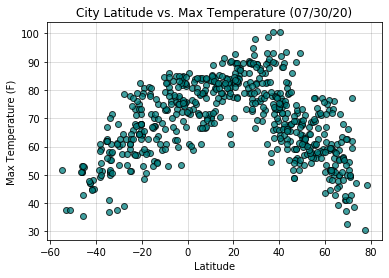

In [107]:
plt.scatter(weather_df["Latitude"],weather_df["Max Temp(F)"],color="teal",edgecolor="black",marker="o",alpha=0.75)
plt.title("City Latitude vs. Max Temperature (07/30/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(color='black', linestyle='-', linewidth=0.5,alpha=0.25)
plt.savefig('../output_data/Fig1.png')
plt.show()

## Latitude vs. Humidity Plot

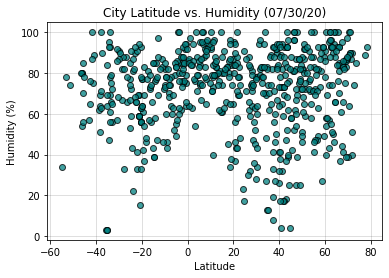

In [108]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity%"],color="teal",edgecolor="black",marker="o",alpha=0.75)
plt.title("City Latitude vs. Humidity (07/30/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(color='black', linestyle='-', linewidth=0.5,alpha=0.25)
plt.savefig('../output_data/Fig2.png')
plt.show()

## Latitude vs. Cloudiness Plot

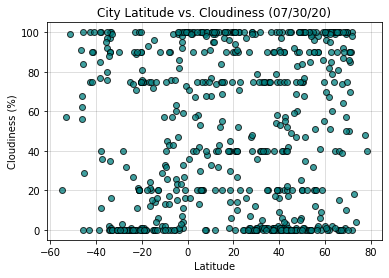

In [109]:
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness%"],color="teal",edgecolor="black",marker="o",alpha=0.75)
plt.title("City Latitude vs. Cloudiness (07/30/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig('../output_data/Fig3.png')
plt.grid(color='black', linestyle='-', linewidth=0.5,alpha=0.25)
plt.show()

## Latitude vs. Wind Speed Plot

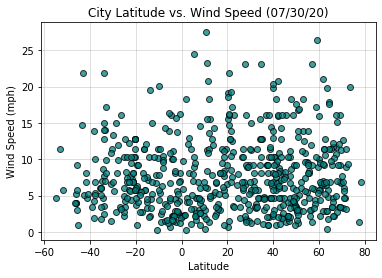

In [110]:
plt.scatter(weather_df["Latitude"],weather_df["Windspeed(MPH)"],color="teal",edgecolor="black",marker="o",alpha=0.75)
plt.title("City Latitude vs. Wind Speed (07/30/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig('../output_data/Fig4.png')
plt.grid(color='black', linestyle='-', linewidth=0.5,alpha=0.25)
plt.show()

## Linear Regression

In [111]:
def regress(x,y,title,xlab,ylab):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(x.min(),y.min()),fontsize=15,color="red")
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [112]:
# Create Northern and Southern Hemisphere DataFrames
north_df = weather_df.loc[weather_df["Hemisphere"]=="North"]
south_df = weather_df.loc[weather_df["Hemisphere"]=="South"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.42209734832003865


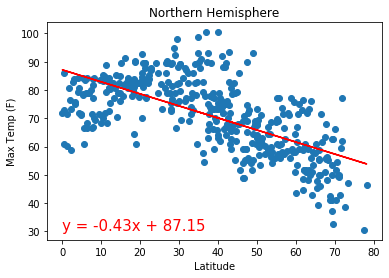

In [113]:
#def regress(x,y,title,xlab,ylab):
regress(north_df['Latitude'],north_df['Max Temp(F)'],"Northern Hemisphere","Latitude","Max Temp (F)")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5282927265920508


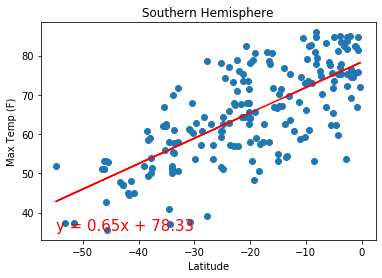

In [114]:
regress(south_df['Latitude'],south_df['Max Temp(F)'],"Southern Hemisphere","Latitude","Max Temp (F)")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0017444241073391645


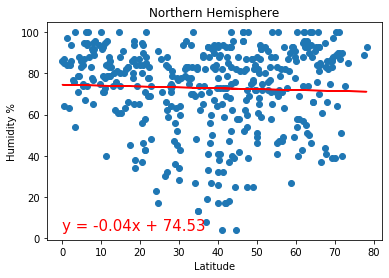

In [115]:
regress(north_df['Latitude'],north_df['Humidity%'],"Northern Hemisphere","Latitude","Humidity %")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.016702031419368924


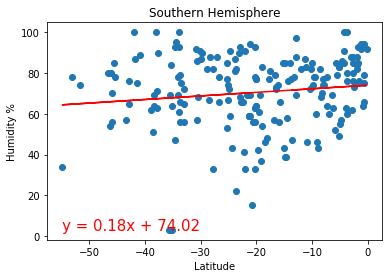

In [116]:
regress(south_df['Latitude'],south_df['Humidity%'],"Southern Hemisphere","Latitude","Humidity %")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0022379747965198434


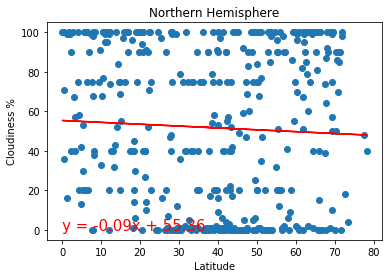

In [117]:
regress(north_df['Latitude'],north_df['Cloudiness%'],"Northern Hemisphere","Latitude","Cloudiness %")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005046820145941562


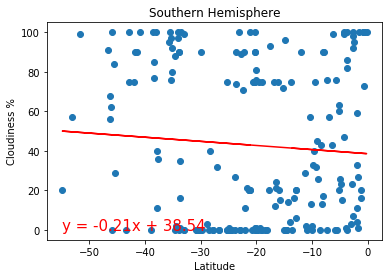

In [118]:
regress(south_df['Latitude'],south_df['Cloudiness%'],"Southern Hemisphere","Latitude","Cloudiness %")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.000649385052432575


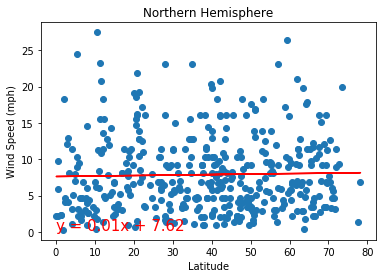

In [119]:
#
#PLUS ADD OUTPUT TO PNG FOR EACH SCATTERPLOT
#
regress(north_df['Latitude'],north_df['Windspeed(MPH)'],"Northern Hemisphere","Latitude","Wind Speed (mph)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.006875783294573805


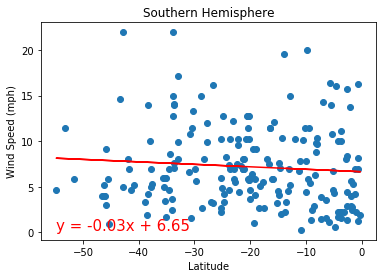

In [120]:
regress(south_df['Latitude'],south_df['Windspeed(MPH)'],"Southern Hemisphere","Latitude","Wind Speed (mph)")